Conducting EDA on US top charting songs from 1921- 2020 to examine relationship between variables and other patterns in the data.

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# shows plots inline
%matplotlib inline

In [2]:
# To suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



In [3]:
df=pd.read_csv('/Users/josephlim/Desktop/Data Science/Capstone Projects/Capstone project- Spotify/Data/Cleaned Data/US_1921-2020_final.csv')

In [4]:
df.shape

(586672, 15)

In [5]:
df.head()

popularity  duration_ms release_date  danceability  energy  key  loudness  \
0           6       126903   1922-02-22         0.645  0.4450    0   -13.338   
1           0        98200   1922-06-01         0.695  0.2630    0   -22.136   
2           0       181640   1922-03-21         0.434  0.1770    1   -21.180   
3           0       176907   1922-03-21         0.321  0.0946    7   -27.961   
4           0       163080         1922         0.402  0.1580    3   -16.900   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.4510         0.674            0.7440     0.151    0.127   
1     1       0.9570         0.797            0.0000     0.148    0.655   
2     1       0.0512         0.994            0.0218     0.212    0.457   
3     1       0.0504         0.995            0.9180     0.104    0.397   
4     0       0.0390         0.989            0.1300     0.311    0.196   

     tempo  time_signature  
0  104.851               3  
1  102.009               1  
2  130.418               5  
3  169.980               3  
4  103.220               4

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586672 non-null  int64  
 1   duration_ms       586672 non-null  int64  
 2   release_date      586672 non-null  object 
 3   danceability      586672 non-null  float64
 4   energy            586672 non-null  float64
 5   key               586672 non-null  int64  
 6   loudness          586672 non-null  float64
 7   mode              586672 non-null  int64  
 8   speechiness       586672 non-null  float64
 9   acousticness      586672 non-null  float64
 10  instrumentalness  586672 non-null  float64
 11  liveness          586672 non-null  float64
 12  valence           586672 non-null  float64
 13  tempo             586672 non-null  float64
 14  time_signature    586672 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 67.1+ MB


### Spotify Audio Features

Spotify provides breaks down its track data using its audio features. The Spotify Web API developer guide defines them as follows:
- Duration: The duration of the track in milliseconds.
- Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- Speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
- Time signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

Because the term "mode" can be confusing given the context of statistical analysis, it will be referred to as "musical mode"(m_mode)

In [7]:
df_m= df.rename(columns={'mode':'m_mode'})

### Distributions of Data
#### Categorical features
There are two categorical features in this datasets: key and mode. 

In [8]:
df_cat=df_m[['key','m_mode']].copy()

In [9]:
df_cat.head()

key  m_mode
0    0       1
1    0       1
2    1       1
3    7       1
4    3       0

Keys are denoted as numbers.0 represents C, and each index represents a semitone increase in key. Musical mode is also denoted as integers, but it is a binary data that indicates whether the song is a major/ minor key. 0 represents minor keys, while 1 represents major.

Values will be replaced to reflect corresponding categories.

In [10]:
df_cat['key'].replace({0:'C',1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#',7:'G',8:'Ab', 9:'A', 10:'Bb',11:'B'}, inplace=True)
df_cat['m_mode'].replace({0:'minor',1:'major'}, inplace=True)

In [11]:
df_cat['key'].value_counts()

C     74950
G     73779
D     66552
A     65128
F     53614
E     48220
C#    41736
B     39132
Bb    37710
Ab    33460
F#    30856
D#    21535
Name: key, dtype: int64

In [12]:
key_order= ['C','C#','D','D#', 'E', 'F','F#','G', 'Ab','A','Bb','B' ]

<AxesSubplot: xlabel='key', ylabel='count'>

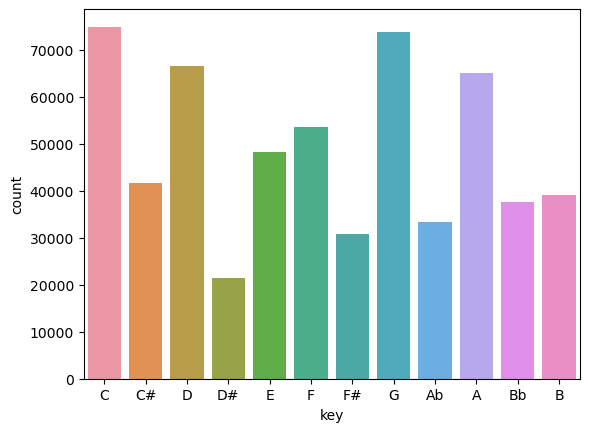

In [13]:
sns.countplot(data=df_cat, order= key_order,x='key')

The most common keys are C and G.

In [14]:
df_cat['m_mode'].value_counts()

major    386498
minor    200174
Name: m_mode, dtype: int64

<AxesSubplot: xlabel='m_mode', ylabel='count'>

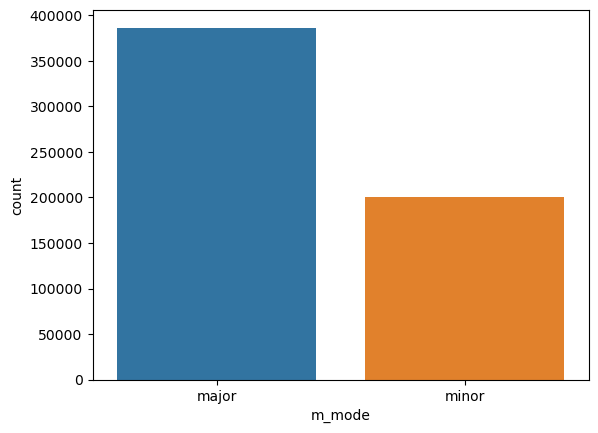

In [15]:
sns.countplot(data= df_cat, x='m_mode')

There are more songs that are major keys.

#### Quantitative data

We will now conduct analysis on numerical features of the dataset.

In [16]:
# Filtering numerical data.
cat_columns= df_cat.columns
df_num= df_m.drop(cat_columns, axis=1)

In [17]:
df_num.columns

Index(['popularity', 'duration_ms', 'release_date', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [18]:
df_num.describe().T

count           mean            std     min          25%  \
popularity        586672.0      27.570053      18.370642     0.0      13.0000   
duration_ms       586672.0  230051.167286  126526.087418  3344.0  175093.0000   
danceability      586672.0       0.563594       0.166103     0.0       0.4530   
energy            586672.0       0.542036       0.251923     0.0       0.3430   
loudness          586672.0     -10.206067       5.089328   -60.0     -12.8910   
speechiness       586672.0       0.104864       0.179893     0.0       0.0340   
acousticness      586672.0       0.449863       0.348837     0.0       0.0969   
instrumentalness  586672.0       0.113451       0.266868     0.0       0.0000   
liveness          586672.0       0.213935       0.184326     0.0       0.0983   
valence           586672.0       0.552292       0.257671     0.0       0.3460   
tempo             586672.0     118.464857      29.764108     0.0      95.6000   
time_signature    586672.0       3.873382       0.473162     0.0       4.0000   

                            50%           75%          max  
popularity            27.000000      41.00000      100.000  
duration_ms       214893.000000  263867.00000  5621218.000  
danceability           0.577000       0.68600        0.991  
energy                 0.549000       0.74800        1.000  
loudness              -9.243000      -6.48200        5.376  
speechiness            0.044300       0.07630        0.971  
acousticness           0.422000       0.78500        0.996  
instrumentalness       0.000024       0.00955        1.000  
liveness               0.139000       0.27800        1.000  
valence                0.564000       0.76900        1.000  
tempo                117.384000     136.32100      246.381  
time_signature         4.000000       4.00000        5.000

In [19]:
df_num.shape

(586672, 13)

In [20]:
df_num.sort_values('popularity', ascending=False)

popularity  duration_ms release_date  danceability  energy  loudness  \
93802          100       198082   2021-03-19         0.677  0.6960    -6.181   
93803           99       242014   2021-01-08         0.585  0.4360    -8.761   
93804           98       132780   2021-01-06         0.778  0.6950    -6.865   
92810           97       215627   2020-03-20         0.680  0.8260    -5.487   
92811           97       160191   2020-12-04         0.653  0.5240    -9.016   
...            ...          ...          ...           ...     ...       ...   
23410            0       198053   1949-01-01         0.682  0.3050    -8.558   
23409            0       171133   1949-01-01         0.527  0.2030   -14.199   
23408            0        46720         1949         0.441  0.2420   -28.776   
23407            0       189973         1949         0.593  0.7480    -6.514   
444118           0       139493   2015-06-29         0.431  0.0325   -17.961   

        speechiness  acousticness  instrumentalness  liveness  valence  \
93802        0.1190        0.3210          0.000000     0.420    0.464   
93803        0.0601        0.7210          0.000013     0.105    0.132   
93804        0.0913        0.1750          0.000000     0.150    0.472   
92810        0.0309        0.0212          0.000012     0.543    0.644   
92811        0.0502        0.1120          0.000000     0.203    0.553   
...             ...           ...               ...       ...      ...   
23410        0.0578        0.9240          0.000000     0.119    0.910   
23409        0.0667        0.9900          0.000012     0.129    0.688   
23408        0.0323        0.9290          0.955000     0.116    0.528   
23407        0.4060        0.8880          0.021800     0.680    0.732   
444118       0.0344        0.9670          0.000000     0.355    0.391   

          tempo  time_signature  
93802    90.030               4  
93803   143.874               4  
93804   149.996               4  
92810   118.051               4  
92811    83.970               4  
...         ...             ...  
23410   152.850               3  
23409   170.733               4  
23408   132.060               4  
23407   123.634               4  
444118  140.434               3  

[586672 rows x 13 columns]

Popularity score should be normalized to better understand its trends and for later use

In [21]:
def score_normalization(score, max_score):
    popularity_normalized= 1- score/ max_score
    
    return popularity_normalized

The normalized popularity score ranges from 0 to 1, with 1 being the most popular. 

In [22]:
df_num['popularity']=df_num['popularity'].apply(lambda x:score_normalization(x,df_num['popularity'].max()))

Also, no one talks about the durations of songs in ms. Let's convert them into to seconds.

In [23]:
def convert_mstosec(ms_input):
    sec_output= ms_input/1000
    return sec_output

In [24]:
df_num['duration']= df_num['duration_ms'].apply(lambda x: convert_mstosec(x))

In [25]:
df_num['duration']

0         126.903
1          98.200
2         181.640
3         176.907
4         163.080
           ...   
586667    258.267
586668    153.293
586669    187.601
586670    142.003
586671    214.360
Name: duration, Length: 586672, dtype: float64

In [26]:
df_num.drop('duration_ms', axis=1, inplace=True)

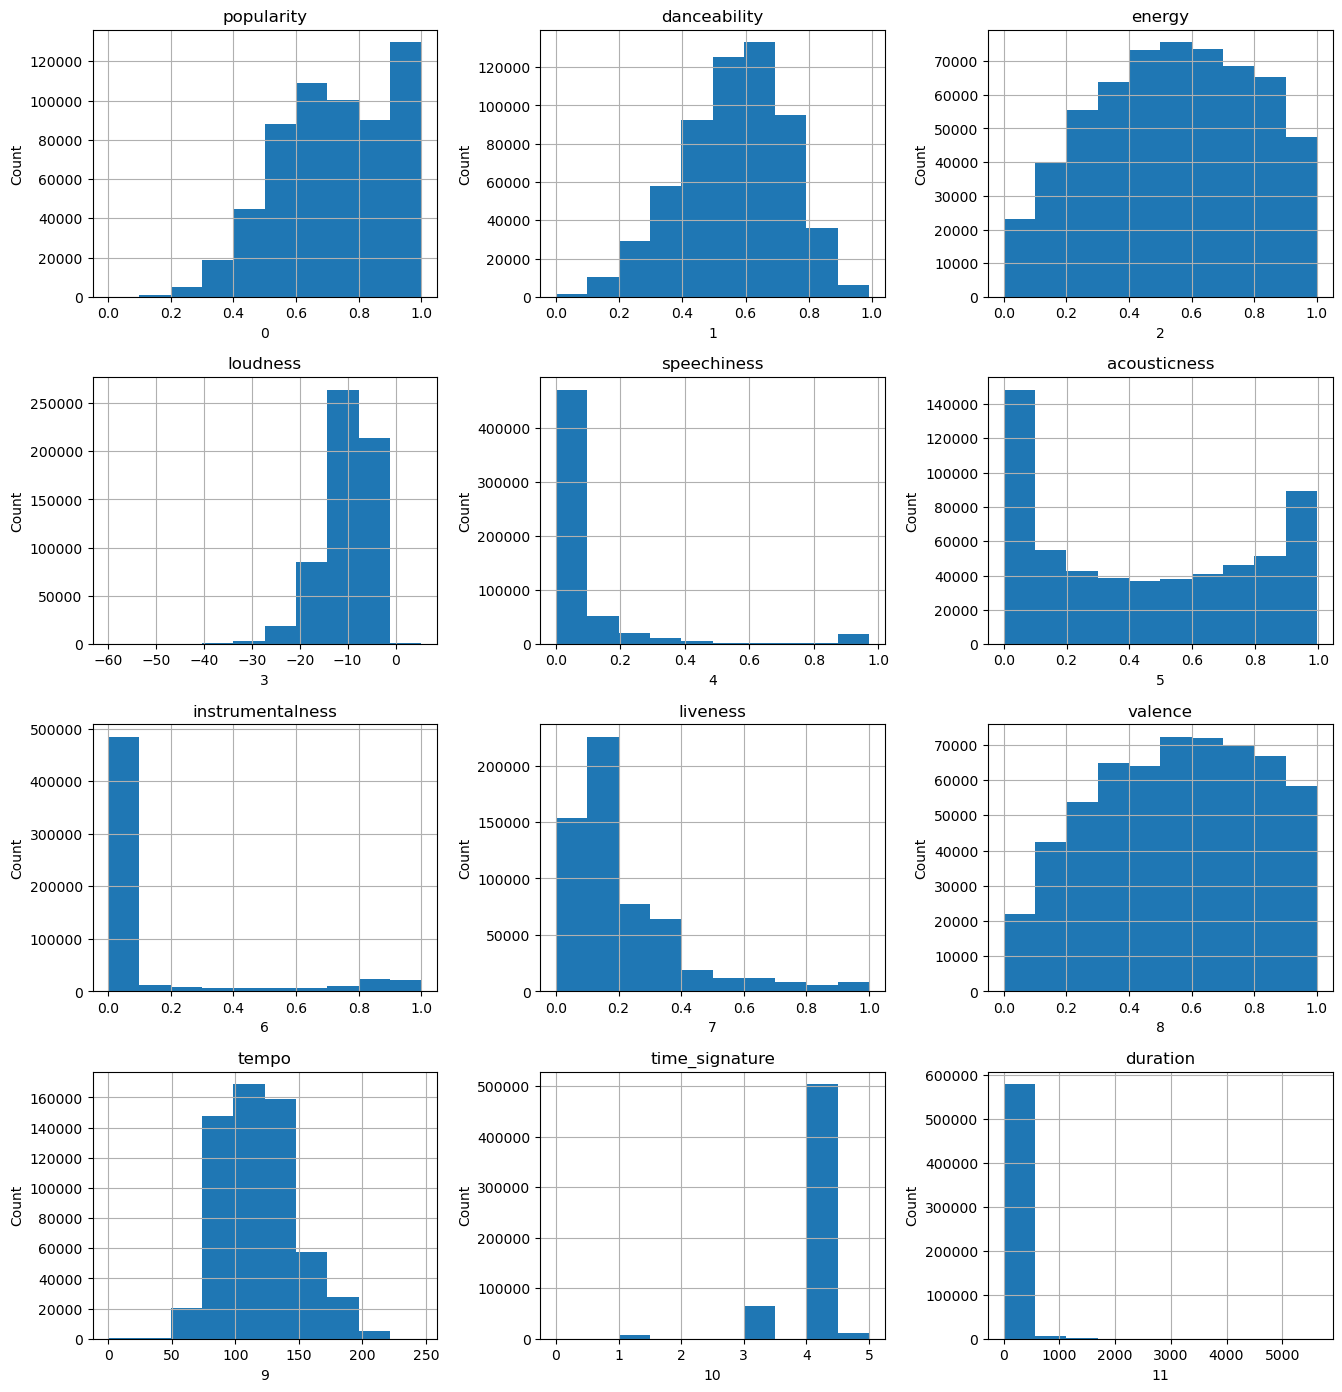

In [27]:
hist= df_num.hist(bins=10, figsize=(16,17))
for i, ax in enumerate(hist.ravel()):
    ax.set_xlabel(f'{i}')
    ax.set_ylabel('Count')

- Energy and valence have noticeably similar distribution. Danceability, loudness, and energy have similar distribution. 

- Most top charting songs tend to be short in duration. They tend to have high energy and loudness, around 0.6 and -10dB, respectively. 
- Most top charting tracks also tend to contain musical vocals(such as singing or rapping),rather than spoken words (as heard in audio books).  
- They also scored low "liveness", which means they are often polished studio recordings than live performances.
- There is lower likelihood that top charting songs are acoustic.
- In terms of valence, the highest distribution was seen between 0.25 and 0.75. 
- Similarly, the highest distribution in danceability was in between 0.5-0.75. 
- The largest tempo distribution in top charting songswas in between 90 to 150 BPM.

#### More in-depth look at individual features:

Text(0.5, 0, 'Seconds')

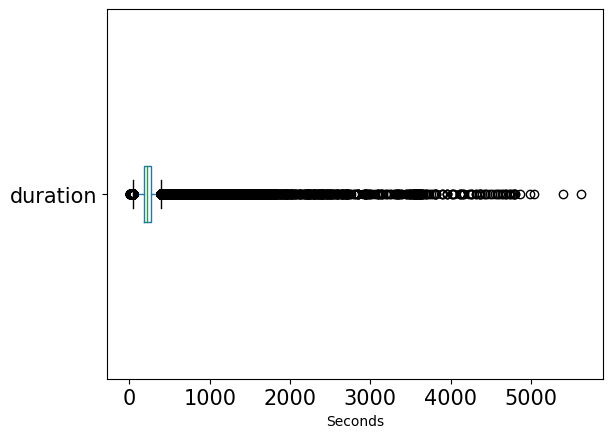

In [28]:
boxplot_dur= df_num.boxplot(column='duration', grid=False, vert=False, fontsize=15)
boxplot_dur.set_xlabel('Seconds')

In [29]:
mean= df_num['duration'].mean()
q25, q75= np.percentile(df_num['duration'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('maximum', maximum)

mean: 230.05116728597918
maximum 397.0280000000001


In [30]:
outliers= df_num[df_num['duration']>maximum]
len(outliers)

25254

Top charting songs have mean length of 230.05 sec. Of 586672 songs, 4% of songs(25254 songs) were longer than 397.028 sec. 

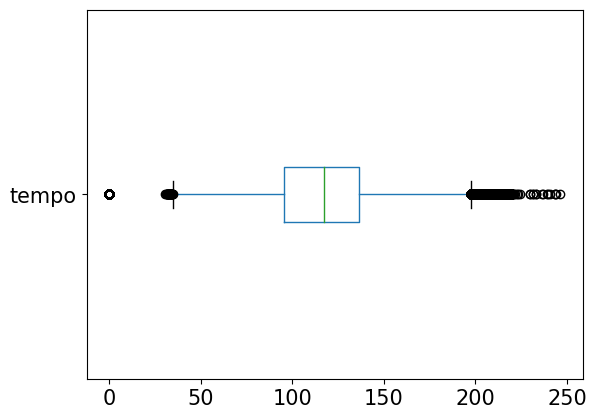

In [31]:
boxplot_tempo= df_num.boxplot(column='tempo', grid=False, vert=False, fontsize=15)

In [32]:
mean= df_num['tempo'].mean()


q25,q75= np.percentile(df_num['tempo'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('maximum', maximum)

mean: 118.46485662687157
maximum 197.4025


In [33]:
outliers= df_num[df_num['tempo']>maximum]
len(outliers)

5336

Top charting songs tend to be medium or faster tempo, with mean tempo of around 120 BPM.  Of 586672 songs, 0.9% of songs(5336 songs) were faster than 197 BPM. 

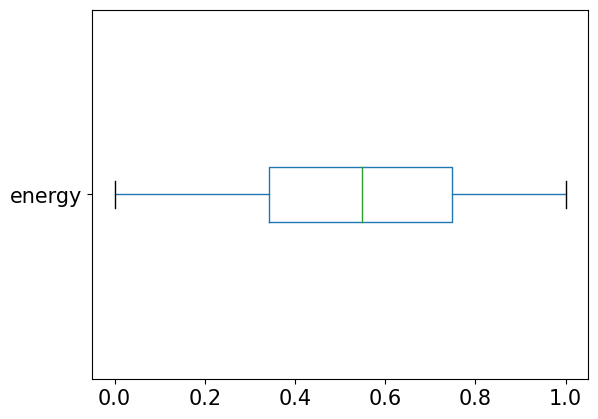

In [34]:
boxpolot_E= df_num.boxplot(column='energy', grid=False, vert=False, fontsize=15)

In [35]:
mean= df_num['energy'].mean()
mode= df_num['energy'].mode()
q25,q75= np.percentile(df_num['energy'],[25,75])
iqr= np.subtract(q75,q25)
minimum= q25- 1.5*iqr
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('minimum:', minimum)
print('mode:', mode)

mean: 0.5420359919116644
minimum: -0.2644999999999999
mode: 0    0.526
Name: energy, dtype: float64


In [36]:
outliers_min= df_num[df_num['energy']<minimum]
outliers_max=df_num[df_num['energy']>maximum]
print('lower_outlier',len(outliers_min))
print('upper_outlier:', len(outliers_max))

lower_outlier 0
upper_outlier: 0


Top charting songs had balanced energy levels across the chart, with mean energy level of 0.542. There was no outlier.

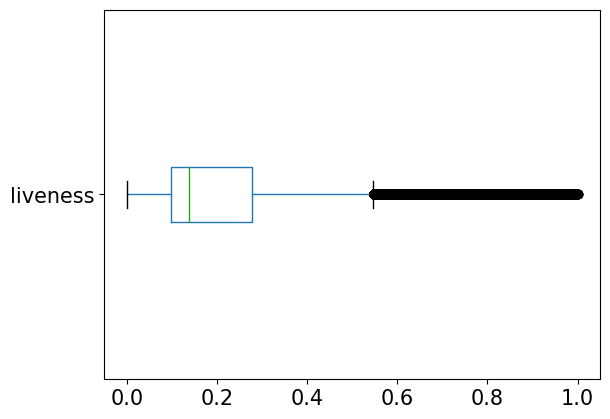

In [37]:
boxpolot_live= df_num.boxplot(column='liveness', grid=False, vert=False, fontsize=15)

In [38]:
mean= df_num['liveness'].mean()

q25,q75= np.percentile(df_num['liveness'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('maximum', maximum)

mean: 0.21393501687484662
maximum 0.5475500000000001


In [39]:
outliers= df_num[df_num['liveness']>maximum]
len(outliers)

40987

Top charting songs tend to be polished studio recording rather than live recording, with mean liveness of 0.2139.
Of 586672 songs, around 7% of songs (40987 songs) had liveness more than 0.54755

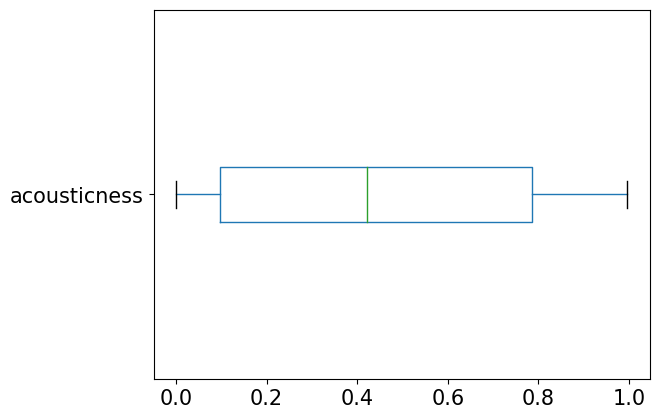

In [40]:
boxpolot_acoust= df_num.boxplot(column='acousticness', grid=False, vert=False, fontsize=15)

In [41]:
mean= df_num['acousticness'].mean()

q25,q75= np.percentile(df_num['acousticness'],[25,75])
iqr= np.subtract(q75,q25)
minimum= q25- 1.5*iqr
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('mode:', mode)
print('maximum', maximum)
print('minimum:', minimum)

mean: 0.44986272444745967
mode: 0    0.526
Name: energy, dtype: float64
maximum 1.8171500000000003
minimum: -0.9352500000000001


In [42]:
outliers_min= df_num[df_num['acousticness']<minimum]
outliers_max=df_num[df_num['acousticness']>maximum]
print('lower_outlier',len(outliers_min))
print('upper_outlier:', len(outliers_max))

lower_outlier 0
upper_outlier: 0


Top charting songs had mean acousticness of 0.44986. As seen by the plot and the mean closer to the center, there is only slight preference towards non-acoustic song.

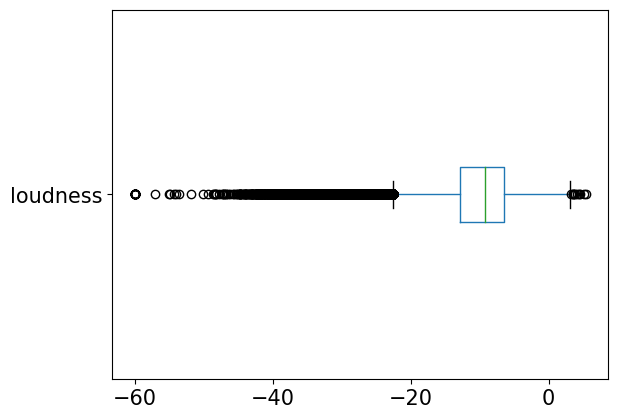

In [43]:
boxpolot_loud= df_num.boxplot(column='loudness', grid=False, vert=False, fontsize=15)

In [44]:
mean= df_num['loudness'].mean()
mode= df_num['loudness'].mode()
q25,q75= np.percentile(df_num['loudness'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr
minimum= q25- 1.5*iqr

print('mean:',mean)
print('mode:', mode)
print('maximum', maximum)
print('minimum:', minimum)


mean: -10.206066809051734
mode: 0   -8.026
Name: loudness, dtype: float64
maximum 3.1315
minimum: -22.5045


In [45]:
outliers_min= df_num[df_num['loudness']<minimum]
outliers_max=df_num[df_num['loudness']>maximum]
print('lower_outlier',len(outliers_min))
print('upper_outlier:', len(outliers_max))

lower_outlier 15096
upper_outlier: 10


Top charting songs tend to be loud, with mean loudness of -10.206 dB. Of 586672 songs, only around 2.57% of songs (15096 songs) had loudness quieter thaniveness more than -22.50 dB. This makes sense, given that the Spotify's loudness guideline is around -14 dB. There were also some minor outliers in the other end of extreme, with approximately 0.00006% of songs (35 songs) being louder than 3.13 dB.

### Visualizing Relationships Between Features

We have seen that there are observable patterns in individual features. We will explore if there are relationships between features. I'll categorize correlation between 0.4- 0.7 moderatcorrelation and those over 0.7 strong correlation. I will be rounding up correlations with aboslute values between 0.35- 0.4.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'popularity'),
  Text(0, 1.5, 'duration_ms'),
  Text(0, 2.5, 'danceability'),
  Text(0, 3.5, 'energy'),
  Text(0, 4.5, 'key'),
  Text(0, 5.5, 'loudness'),
  Text(0, 6.5, 'mode'),
  Text(0, 7.5, 'speechiness'),
  Text(0, 8.5, 'acousticness'),
  Text(0, 9.5, 'instrumentalness'),
  Text(0, 10.5, 'liveness'),
  Text(0, 11.5, 'valence'),
  Text(0, 12.5, 'tempo'),
  Text(0, 13.5, 'time_signature')])

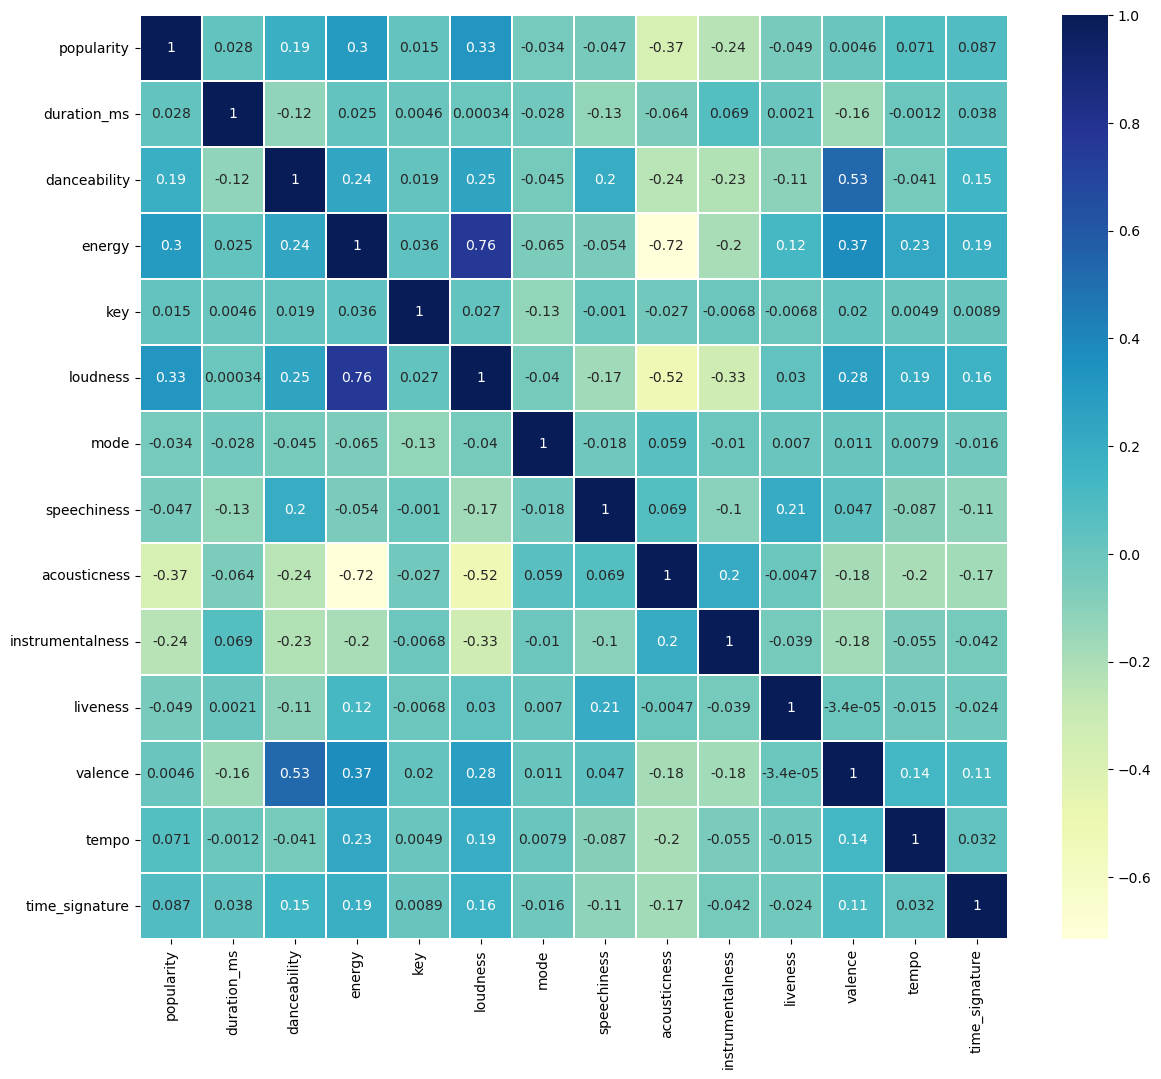

In [46]:
# Heatmap to visualize data relationships
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

#### Strong positive correlations:
energy: loudness (0.76)

#### Moderate correlations:
valence: danceability (0.53)
<br> valence: energy(0.37)

#### Strong negative correaltions:
energy: acousticness (-0.72)

#### Moderate negative correlations:
loudness: acousticness (-0.52)
<br> acousticness: popularity (-0.37)



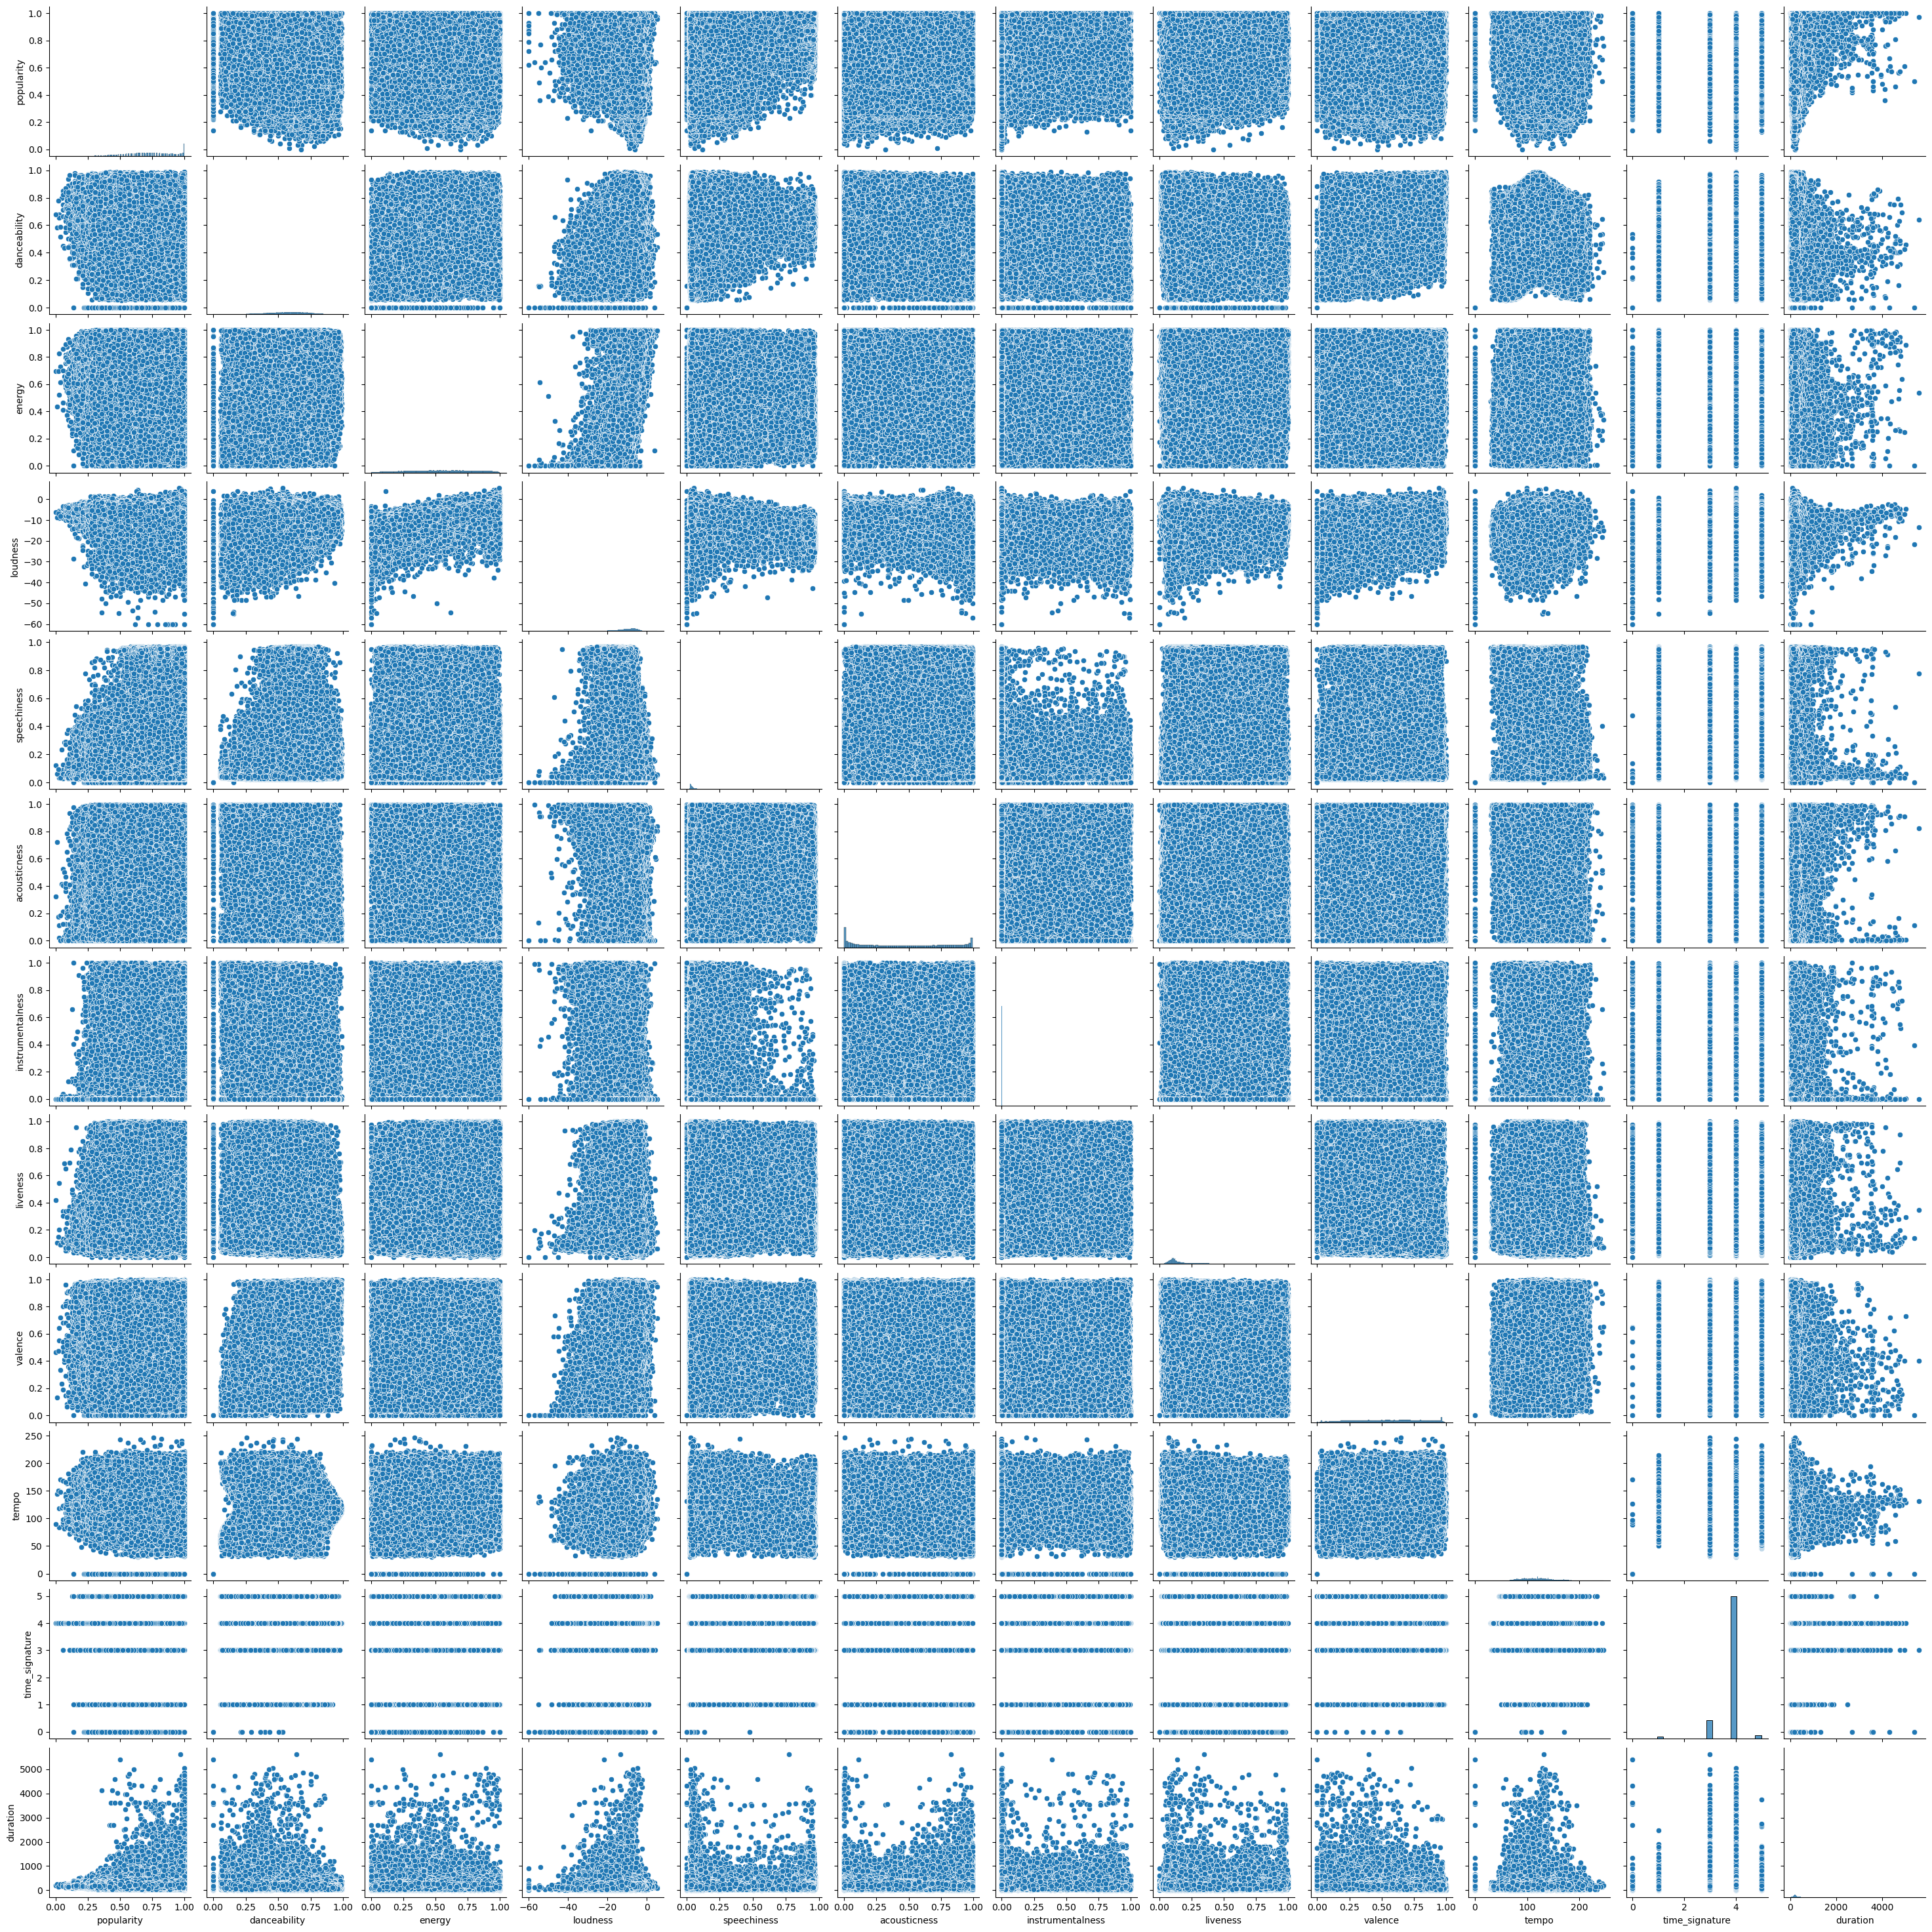

In [47]:
g= sns.pairplot(df_num, palette= 'Set1')
plt.show()

Not much correlation was seen in the data. This is to be expected, given how much music changes in a century. Let's try breaking down the data by year.

In [48]:
df_num['year']= pd.DatetimeIndex(df_num['release_date']).year

In [49]:
year_list= df_num['year'].unique().tolist()
year_list.sort()

data_year=[]
for i in range(len(year_list)):
    data_year.append(df_num[df_num['year']== year_list[i]])

In [50]:
len(data_year)

101

The earliest data we have is from 1900. While one may expect music from 1900 to be significantly different from 1922, let's examine it.

/Users/josephlim/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/josephlim/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'popularity'),
  Text(0, 1.5, 'danceability'),
  Text(0, 2.5, 'energy'),
  Text(0, 3.5, 'loudness'),
  Text(0, 4.5, 'speechiness'),
  Text(0, 5.5, 'acousticness'),
  Text(0, 6.5, 'instrumentalness'),
  Text(0, 7.5, 'liveness'),
  Text(0, 8.5, 'valence'),
  Text(0, 9.5, 'tempo'),
  Text(0, 10.5, 'time_signature'),
  Text(0, 11.5, 'duration')])

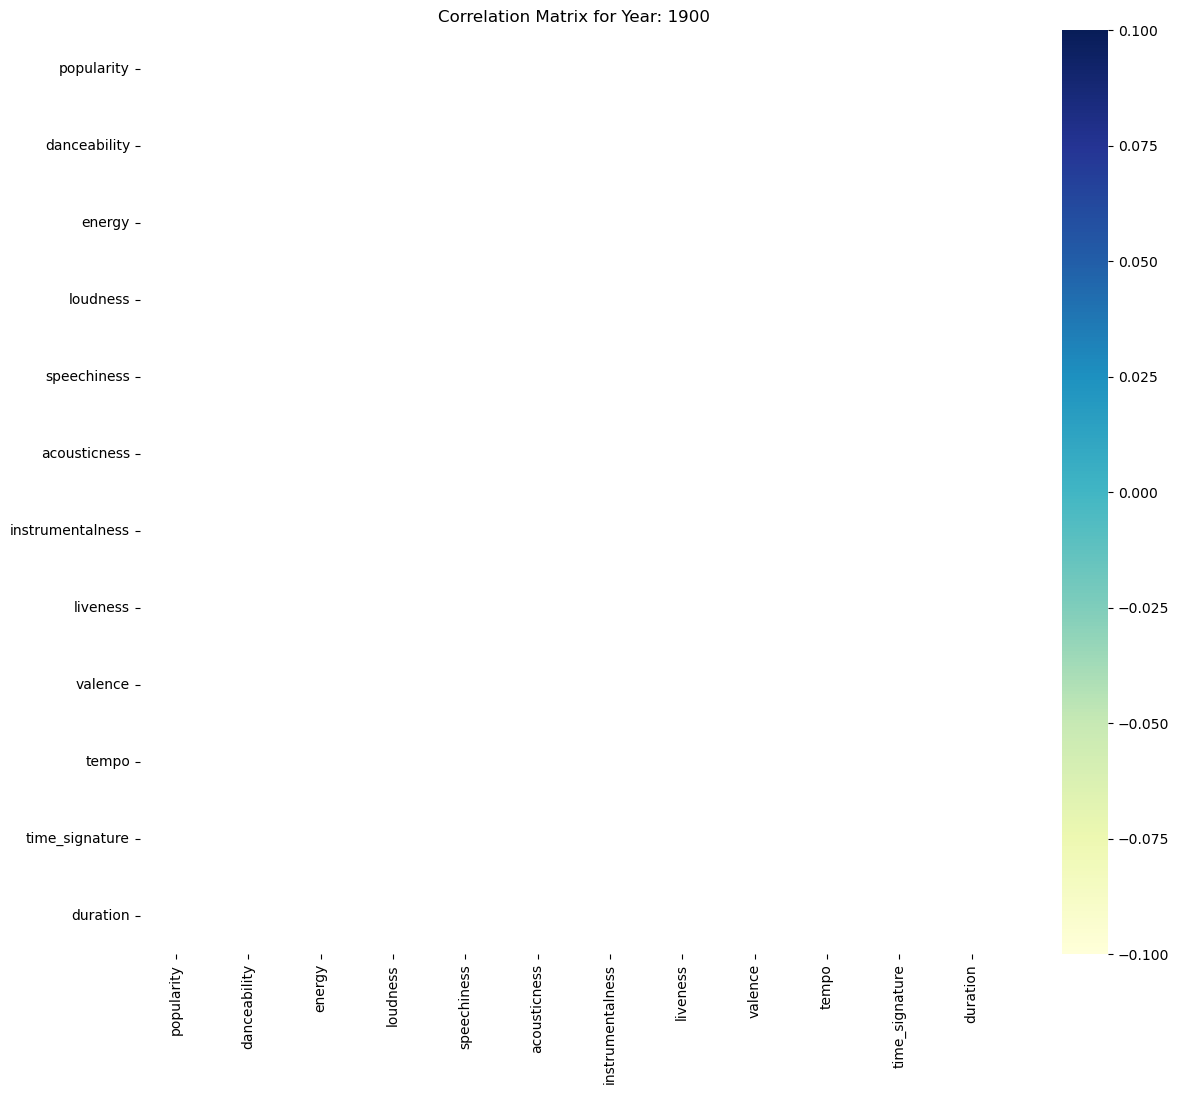

In [51]:
# Heatmap to visualize data relationships
# Heatmap to visualize data relationships
df_noyear=data_year[0].drop('year', axis=1)

plt.figure(figsize=(14,12))
sns.heatmap(df_noyear.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.title(label=f"Correlation Matrix for Year: {year_list[0]}")
plt.yticks(rotation=0)


It seems like there isn't much to dissect from 1900. Onto the next year!

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'popularity'),
  Text(0, 1.5, 'danceability'),
  Text(0, 2.5, 'energy'),
  Text(0, 3.5, 'loudness'),
  Text(0, 4.5, 'speechiness'),
  Text(0, 5.5, 'acousticness'),
  Text(0, 6.5, 'instrumentalness'),
  Text(0, 7.5, 'liveness'),
  Text(0, 8.5, 'valence'),
  Text(0, 9.5, 'tempo'),
  Text(0, 10.5, 'time_signature'),
  Text(0, 11.5, 'duration')])

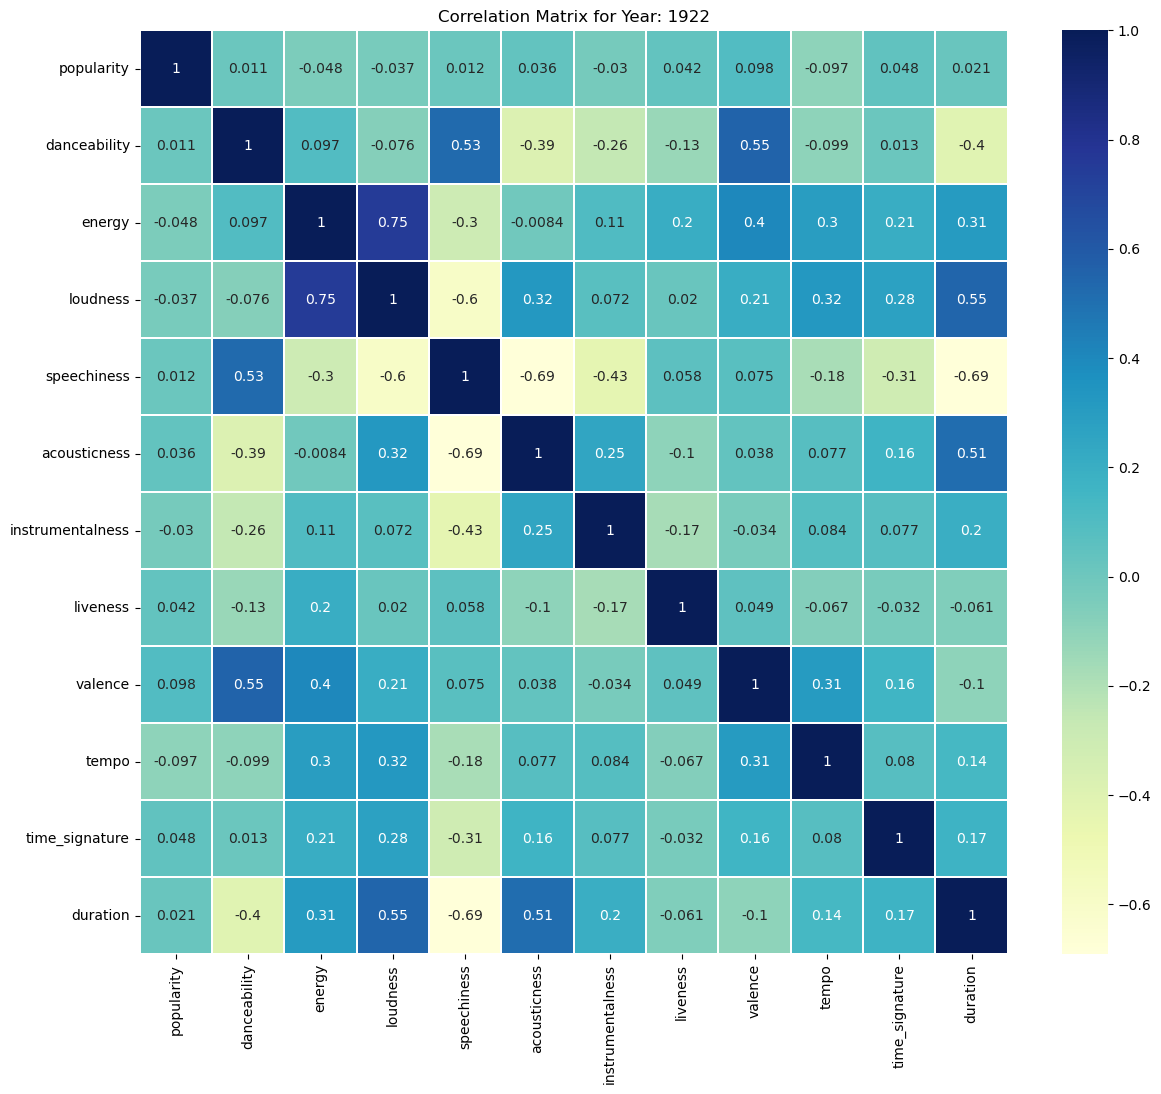

In [52]:
# Heatmap to visualize data relationships
df_noyear=data_year[1].drop('year', axis=1)

plt.figure(figsize=(14,12))
sns.heatmap(df_noyear.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.title(label=f"Correlation Matrix for Year: {year_list[1]}")
plt.yticks(rotation=0)

#### Strong positive correlations:
energy: loudness (0.75)

#### Moderate positive correlations:
loudness: duration (0.55)
<br> acousticness: duration (0.51)
<br> valence: danceability (0.55)
<br> speechiness: danceability (0.53)
<br> valence: energy(0.4)

#### Strong negative correaltions:
energy: acousticness (-0.72)

#### Moderate negative correlations:
loudness: acousticness (-0.52)
<br> acousticness: popularity (-0.37)




In [53]:
corr_mat=data_year[1].corr()
corr_mat

popularity  danceability    energy  loudness  speechiness  \
popularity          1.000000      0.011062 -0.047754 -0.037055     0.011578   
danceability        0.011062      1.000000  0.096760 -0.076078     0.527206   
energy             -0.047754      0.096760  1.000000  0.750777    -0.299850   
loudness           -0.037055     -0.076078  0.750777  1.000000    -0.597521   
speechiness         0.011578      0.527206 -0.299850 -0.597521     1.000000   
acousticness        0.036344     -0.387384 -0.008380  0.324189    -0.691520   
instrumentalness   -0.029931     -0.260191  0.106543  0.071850    -0.427309   
liveness            0.041826     -0.130255  0.202934  0.019648     0.058025   
valence             0.097501      0.553361  0.400043  0.205799     0.074690   
tempo              -0.097106     -0.099361  0.298440  0.322382    -0.177114   
time_signature      0.048116      0.013238  0.205536  0.278271    -0.313630   
duration            0.021030     -0.401094  0.306251  0.550389    -0.687610   
year                     NaN           NaN       NaN       NaN          NaN   

                  acousticness  instrumentalness  liveness   valence  \
popularity            0.036344         -0.029931  0.041826  0.097501   
danceability         -0.387384         -0.260191 -0.130255  0.553361   
energy               -0.008380          0.106543  0.202934  0.400043   
loudness              0.324189          0.071850  0.019648  0.205799   
speechiness          -0.691520         -0.427309  0.058025  0.074690   
acousticness          1.000000          0.252077 -0.101824  0.037827   
instrumentalness      0.252077          1.000000 -0.169922 -0.034217   
liveness             -0.101824         -0.169922  1.000000  0.048917   
valence               0.037827         -0.034217  0.048917  1.000000   
tempo                 0.076641          0.084066 -0.067414  0.309427   
time_signature        0.164150          0.077233 -0.032136  0.157358   
duration              0.513407          0.198971 -0.061487 -0.100513   
year                       NaN               NaN       NaN       NaN   

                     tempo  time_signature  duration  year  
popularity       -0.097106        0.048116  0.021030   NaN  
danceability     -0.099361        0.013238 -0.401094   NaN  
energy            0.298440        0.205536  0.306251   NaN  
loudness          0.322382        0.278271  0.550389   NaN  
speechiness      -0.177114       -0.313630 -0.687610   NaN  
acousticness      0.076641        0.164150  0.513407   NaN  
instrumentalness  0.084066        0.077233  0.198971   NaN  
liveness         -0.067414       -0.032136 -0.061487   NaN  
valence           0.309427        0.157358 -0.100513   NaN  
tempo             1.000000        0.080492  0.137914   NaN  
time_signature    0.080492        1.000000  0.168222   NaN  
duration          0.137914        0.168222  1.000000   NaN  
year                   NaN             NaN       NaN   NaN

While it is nice to be able to visualize correlations, it will be a bit much to do so for 101 years of data. I'll simply extract features, correlation values, and year. 

In [54]:
df_corr_raw= pd.DataFrame(columns=['year','feature_1', 'feature_2', 'corr_value'])

for year in range(len(data_year)):

    corr_mat= data_year[year].corr()
    df_stack = corr_mat.stack().reset_index()
    
    #set column names
    df_stack.columns=['feature_1', 'feature_2', 'corr_value']
    df_stack.drop_duplicates(inplace=True)
    
    # Year
    df_stack['year']=year_list[year]
    
    df_corr_raw= df_corr_raw.append(df_stack)
    

df_corr_raw.reset_index()

index  year   feature_1       feature_2  corr_value
0          0  1922  popularity      popularity    1.000000
1          1  1922  popularity    danceability    0.011062
2          2  1922  popularity          energy   -0.047754
3          3  1922  popularity        loudness   -0.037055
4          4  1922  popularity     speechiness    0.011578
...      ...   ...         ...             ...         ...
14395    139  2021    duration        liveness    0.010677
14396    140  2021    duration         valence   -0.060160
14397    141  2021    duration           tempo   -0.017088
14398    142  2021    duration  time_signature    0.035097
14399    143  2021    duration        duration    1.000000

[14400 rows x 5 columns]

In [55]:
df_corr_raw.shape

(14400, 4)

In [56]:
df_corr_raw['year'].unique()

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=object)

In [57]:
# Make sure to sort before dropping duplicates based on tfidf values
df_raw_sorted= df_corr_raw.sort_values(['year','feature_1','feature_2']).reset_index().drop('index', axis=1)

# Will be vectorizing years and two features
pre_count= df_raw_sorted.copy()
pre_count['yr_str']=pre_count['year'].map(str)
pre_count['yr_feat_concat']= pre_count[['yr_str','feature_1','feature_2']].apply(" ".join, axis=1)

count_vect= CountVectorizer()
frq= pd.DataFrame(count_vect.fit_transform(pre_count['yr_feat_concat']))
pre_count['frq']= frq
pre_count['frq']=pre_count['frq'].map(str)

df_counted= pre_count.drop_duplicates(subset='frq', keep='first')

In [58]:
df_counted['year'].unique()

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=object)

In [59]:
df_counted.shape

(7800, 7)

In [60]:
df_counted.head(200)

year         feature_1         feature_2  corr_value yr_str  \
0    1922      acousticness      acousticness    1.000000   1922   
1    1922      acousticness      danceability   -0.387384   1922   
2    1922      acousticness          duration    0.513407   1922   
3    1922      acousticness            energy   -0.008380   1922   
4    1922      acousticness  instrumentalness    0.252077   1922   
..    ...               ...               ...         ...    ...   
333  1924            energy             tempo    0.082485   1924   
334  1924            energy    time_signature    0.149907   1924   
335  1924            energy           valence    0.371884   1924   
340  1924  instrumentalness  instrumentalness    1.000000   1924   
341  1924  instrumentalness          liveness    0.195756   1924   

                             yr_feat_concat  \
0            1922 acousticness acousticness   
1            1922 acousticness danceability   
2                1922 acousticness duration   
3                  1922 acousticness energy   
4        1922 acousticness instrumentalness   
..                                      ...   
333                       1924 energy tempo   
334              1924 energy time_signature   
335                     1924 energy valence   
340  1924 instrumentalness instrumentalness   
341          1924 instrumentalness liveness   

                                           frq  
0                     (0, 0)\t1\n  (0, 100)\t2  
1      (0, 0)\t1\n  (0, 100)\t1\n  (0, 101)\t1  
2      (0, 0)\t1\n  (0, 100)\t1\n  (0, 102)\t1  
3      (0, 0)\t1\n  (0, 100)\t1\n  (0, 103)\t1  
4      (0, 0)\t1\n  (0, 100)\t1\n  (0, 104)\t1  
..                                         ...  
333    (0, 103)\t1\n  (0, 109)\t1\n  (0, 2)\t1  
334    (0, 103)\t1\n  (0, 110)\t1\n  (0, 2)\t1  
335    (0, 103)\t1\n  (0, 111)\t1\n  (0, 2)\t1  
340                   (0, 104)\t2\n  (0, 2)\t1  
341    (0, 104)\t1\n  (0, 105)\t1\n  (0, 2)\t1  

[200 rows x 7 columns]

In [61]:
df_counted.columns

Index(['year', 'feature_1', 'feature_2', 'corr_value', 'yr_str',
       'yr_feat_concat', 'frq'],
      dtype='object')

In [62]:
df_counted= df_counted.drop([ 'yr_str', 'yr_feat_concat',
       'frq'],axis=1)

In [63]:
df_counted.head()

year     feature_1         feature_2  corr_value
0  1922  acousticness      acousticness    1.000000
1  1922  acousticness      danceability   -0.387384
2  1922  acousticness          duration    0.513407
3  1922  acousticness            energy   -0.008380
4  1922  acousticness  instrumentalness    0.252077

In [64]:
corr_strength=[]
corr_value= df_counted['corr_value']

for i in corr_value:        
    # Correlation strength
    if (i>0.7)& (i !=1):
        strength= 'Strong Positive'
    elif (i <0.7) & (i>0.4):
        strength= 'Moderate Postive'
    elif (i< -0.7)& (i != -1):
        strength= 'Strong Negative'
    elif (i> -0.7) & (i< -0.4):
        strength= 'Moderate Negative'
    else:
        strength= 'Negligible'
    corr_strength.append(strength)

df_counted['corr_strength']= corr_strength
    

In [65]:
df_counted.shape

(7800, 5)

In [66]:
df_counted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7800 entries, 0 to 14399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7800 non-null   object 
 1   feature_1      7800 non-null   object 
 2   feature_2      7800 non-null   object 
 3   corr_value     7800 non-null   float64
 4   corr_strength  7800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 365.6+ KB


In [67]:
df_nonneg= df_counted[df_counted['corr_strength']!='Negligible'].reset_index()
df_nonneg

index  year         feature_1         feature_2  corr_value  \
0        2  1922      acousticness          duration    0.513407   
1        8  1922      acousticness       speechiness   -0.691520   
2       14  1922      danceability          duration   -0.401094   
3       20  1922      danceability       speechiness    0.527206   
4       23  1922      danceability           valence    0.553361   
..     ...   ...               ...               ...         ...   
502  14296  2021            energy  instrumentalness   -0.453554   
503  14298  2021            energy          loudness    0.784930   
504  14303  2021            energy           valence    0.438425   
505  14310  2021  instrumentalness          loudness   -0.660876   
506  14339  2021          loudness           valence    0.422680   

         corr_strength  
0     Moderate Postive  
1    Moderate Negative  
2    Moderate Negative  
3     Moderate Postive  
4     Moderate Postive  
..                 ...  
502  Moderate Negative  
503    Strong Positive  
504   Moderate Postive  
505  Moderate Negative  
506   Moderate Postive  

[507 rows x 6 columns]

In [68]:
df_21=df_nonneg[df_nonneg['year']==2021]
print(f"Total of {len(df_21)}")
df_21

Total of 8


index  year         feature_1         feature_2  corr_value  \
499  14259  2021      acousticness            energy   -0.669449   
500  14262  2021      acousticness          loudness   -0.551294   
501  14279  2021      danceability           valence    0.406997   
502  14296  2021            energy  instrumentalness   -0.453554   
503  14298  2021            energy          loudness    0.784930   
504  14303  2021            energy           valence    0.438425   
505  14310  2021  instrumentalness          loudness   -0.660876   
506  14339  2021          loudness           valence    0.422680   

         corr_strength  
499  Moderate Negative  
500  Moderate Negative  
501   Moderate Postive  
502  Moderate Negative  
503    Strong Positive  
504   Moderate Postive  
505  Moderate Negative  
506   Moderate Postive

In [69]:
df_20=df_nonneg[df_nonneg['year']==2020]
print(f"Total of {len(df_20)}")
df_20

Total of 3


index  year         feature_1   feature_2  corr_value      corr_strength
496  14115  2020      acousticness      energy   -0.607018  Moderate Negative
497  14154  2020            energy    loudness    0.663502   Moderate Postive
498  14167  2020  instrumentalness  popularity    0.415825   Moderate Postive

In [70]:
df_19=df_nonneg[df_nonneg['year']==2019]
print(f"Total of {len(df_19)}")
df_19

Total of 4


index  year         feature_1   feature_2  corr_value      corr_strength
492  13971  2019      acousticness      energy   -0.612571  Moderate Negative
493  13974  2019      acousticness    loudness   -0.414983  Moderate Negative
494  14010  2019            energy    loudness    0.684709   Moderate Postive
495  14023  2019  instrumentalness  popularity    0.429471   Moderate Postive

In [71]:
df_18=df_nonneg[df_nonneg['year']==2018]
print(f"Total of {len(df_18)}")
df_18

Total of 5


index  year         feature_1   feature_2  corr_value      corr_strength
487  13827  2018      acousticness      energy   -0.639358  Moderate Negative
488  13830  2018      acousticness    loudness   -0.460460  Moderate Negative
489  13847  2018      danceability     valence    0.419890   Moderate Postive
490  13866  2018            energy    loudness    0.648662   Moderate Postive
491  13879  2018  instrumentalness  popularity    0.452245   Moderate Postive

In [72]:
df_corr= df_counted[df_counted['corr_value']!=1].reset_index()

We might need 'neglibile' correlation values later. We'll keep them for now.

In [73]:
df_corr.shape

(6600, 6)

We will try to explore different combination between features and their correlation values. We will then try to explore if there is any pattern in correlation.

In [74]:
corr_feat= df_corr[['feature_1', 'feature_2']].apply(" ".join, axis=1)
df_corr['corr_feat']=corr_feat
df_corr['corr_feat']=df_corr['corr_feat'].str.title()

# Rearranging column orders
cols=['year', 'feature_1', 'feature_2', 'corr_feat','corr_value', 'corr_strength']
df_corr=df_corr[cols]

In [75]:
df_corr.head()

year     feature_1         feature_2                      corr_feat  \
0  1922  acousticness      danceability      Acousticness Danceability   
1  1922  acousticness          duration          Acousticness Duration   
2  1922  acousticness            energy            Acousticness Energy   
3  1922  acousticness  instrumentalness  Acousticness Instrumentalness   
4  1922  acousticness          liveness          Acousticness Liveness   

   corr_value     corr_strength  
0   -0.387384        Negligible  
1    0.513407  Moderate Postive  
2   -0.008380        Negligible  
3    0.252077        Negligible  
4   -0.101824        Negligible

In [76]:
df_corr.columns

Index(['year', 'feature_1', 'feature_2', 'corr_feat', 'corr_value',
       'corr_strength'],
      dtype='object')

Let's make sure there isn't any different feature names that mean the same thing (i.e. acousticness vs. duration and duration vs. acousticness). Notice that we only removed duplicate features/correlation values before, which accomplished what we wanted as a byproduct. Also, while we have removed duplicate feature names before, we only did so in a single year. It can't hurt to check for duplicate feature names across different years. If there are any different feature names that mean the same thing, we should unify them.

In [77]:
corr_feat_sort= df_corr['corr_feat'].unique()
corr_feat_sort.sort()

In [78]:
len(corr_feat_sort)

66

In [79]:
feat_df=pd.DataFrame(corr_feat_sort)
feat_df=feat_df.astype(str)

feat_frq= pd.DataFrame(count_vect.fit_transform(feat_df[0]))
feat_frq.duplicated().any()

/Users/josephlim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:1314: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  return duplicated(self._values, keep=keep)


False

There seems to be common feature correlations that exist throughout years. Let's examine data from the past 10 years and identify them. Let's try taking averages of correlation values. 

In [80]:
past_ten= year_list[90:]
features=feat_df.iloc[:,0]

df_past10=df_corr.loc[df_corr['year'].isin(past_ten)]


avg_corr=pd.DataFrame(columns=['features','corrs_avg'])
corr_avg=[]


for i in range(len(features)):
    df=df_past10[df_past10['corr_feat']==features[i]]
    df=df.reset_index()
    
    corr_avg.append(df['corr_value'].mean())
        
avg_corr['corrs_avg']= corr_avg
avg_corr['features']= features

avg_corr

features  corrs_avg
0       Acousticness Danceability  -0.165762
1           Acousticness Duration  -0.023182
2             Acousticness Energy  -0.668899
3   Acousticness Instrumentalness  -0.002540
4           Acousticness Liveness  -0.069269
..                            ...        ...
61     Speechiness Time_Signature   0.031466
62            Speechiness Valence   0.080808
63           Tempo Time_Signature   0.044240
64                  Tempo Valence   0.060040
65         Time_Signature Valence   0.094987

[66 rows x 2 columns]

In [81]:
avg_modstrong= avg_corr.loc[(avg_corr['corrs_avg']>0.5)|(avg_corr['corrs_avg']< -0.5)]
avg_modstrong

features  corrs_avg
2   Acousticness Energy  -0.668899
32      Energy Loudness   0.704567

Acousticness/energy and energy/loudness pairs are also found here. This means popular songs the past ten years tend to have negative correlation between acousticness/energy and positive correlation between energy/ loudness.

Let's see if there are correlations in correlations between features and time. First we'll try to find correlations between correlations between two features(we'll be called **features correlation** from this point on) and time throughout the entire dataset(called **correlation-time correlation** moving forward). We'll then focus on data from the past ten years.

In [82]:
features=feat_df.iloc[:,0]
feat_time_corr=pd.DataFrame(columns=['features','corrs_across_years'])
pearson_list=[]
lessthan30=[]


for i in features:
    df=df_corr[df_corr['corr_feat']==i]
    df=df.reset_index()
    
    if len(df[df['corr_strength']!='Negligible'])<30:
        lessthan30.append(i)
    else:
        corr_mat= pearsonr(x=df['year'], y= df['corr_value'])
        pearson_list.append(corr_mat)
        
pearson_r=[a for a,b in pearson_list]
feat_time_corr['corrs_across_years']= pearson_r
feat_time_corr['features']= features

print(f"{len(lessthan30)} features have less than 30 non-negligible correlation values.")  

df_feat_filt=feat_time_corr.loc[(feat_time_corr['corrs_across_years']> 0.5) | (feat_time_corr['corrs_across_years']< -0.5)]
df_feat_filt

61 features have less than 30 non-negligible correlation values.


features  corrs_across_years
0  Acousticness Danceability           -0.801995
1      Acousticness Duration           -0.794664

Overall, there is a strong negative correlation-time correlation in "Acousticness Danceability" and "Acousticness Duration". We'll now analyze the data the past ten years and see if we still see this features correlation after narrowing down the time frame. 

In [83]:
feat_conc= df_nonneg[['feature_1', 'feature_2']].apply(" ".join, axis=1)
df_nonneg['corr_feat']=feat_conc
df_nonneg['corr_feat']=df_nonneg['corr_feat'].str.title()

# Rearranging column orders
cols=['year', 'feature_1', 'feature_2', 'corr_feat','corr_value', 'corr_strength']
df_nonneg=df_nonneg[cols]

In [84]:
past_ten= year_list[90:]
features=feat_df.iloc[:,0]

correl_str=['Strong Positive', 'Strong Negative']

df_past10=df_corr.loc[df_corr['year'].isin(past_ten)]


past_ten_corr=pd.DataFrame(columns=['features','corrs_across_years'])
pearson_list=[]
lessthan5=[]


for i in features:
    df=df_past10[df_past10['corr_feat']==i]
    df=df.reset_index()
    
    if len(df[df['corr_strength']=='Negligible'])<5:
        lessthan5.append(i)
    
    else: 
#         df_ten_filt=df[df['corr_strength'].isin(correl_str)]
        corr_mat= pearsonr(x=df['year'], y= df['corr_value'])
        pearson_list.append(corr_mat)
        
        
pearson_r=[a for a,b in pearson_list]
past_ten_corr['corrs_across_years']= pearson_r
past_ten_corr['features']= features


df_ten_filt=past_ten_corr.loc[(past_ten_corr['corrs_across_years']> 0.5) | (past_ten_corr['corrs_across_years']< -0.5)]

print(f"{len(lessthan5)} features have less than 5 non-negligible correlation values.")
print(f"{len(df_ten_filt)} features have more than 5 non-negligible correlation values.")

df_ten_filt
# past_ten_corr

4 features have less than 5 non-negligible correlation values.
26 features have more than 5 non-negligible correlation values.


features  corrs_across_years
3   Acousticness Instrumentalness           -0.527061
5           Acousticness Loudness            0.802708
11          Danceability Duration           -0.848013
13  Danceability Instrumentalness            0.618397
14          Danceability Liveness           -0.692279
15          Danceability Loudness            0.835612
16        Danceability Popularity            0.848246
17       Danceability Speechiness            0.619665
18             Danceability Tempo            0.775958
19    Danceability Time_Signature           -0.627455
21                Duration Energy            0.892333
22      Duration Instrumentalness            0.725145
23              Duration Liveness           -0.871709
25            Duration Popularity            0.637922
26           Duration Speechiness            0.910631
30        Energy Instrumentalness           -0.935239
35                   Energy Tempo           -0.632838
37                 Energy Valence           -0.875790
39      Instrumentalness Loudness           -0.694665
40    Instrumentalness Popularity           -0.526288
48                 Liveness Tempo           -0.689862
52           Loudness Speechiness           -0.770523
55               Loudness Valence           -0.543795
56         Popularity Speechiness            0.926767
58      Popularity Time_Signature           -0.762251
60              Speechiness Tempo            0.514028

Let's look at feature combinations with positive correlation with time.

In [85]:
df_ten_positive= df_ten_filt.loc[df_ten_filt['corrs_across_years']>0.5]
len(df_ten_positive)

12

In [86]:
df_ten_positive= df_ten_filt.loc[df_ten_filt['corrs_across_years']>0.7]
print(len(df_ten_positive))
df_ten_positive

8


features  corrs_across_years
5       Acousticness Loudness            0.802708
15      Danceability Loudness            0.835612
16    Danceability Popularity            0.848246
18         Danceability Tempo            0.775958
21            Duration Energy            0.892333
22  Duration Instrumentalness            0.725145
26       Duration Speechiness            0.910631
56     Popularity Speechiness            0.926767

In [87]:
df_ten_positive['features'].unique()

array(['Acousticness Loudness', 'Danceability Loudness',
       'Danceability Popularity', 'Danceability Tempo', 'Duration Energy',
       'Duration Instrumentalness', 'Duration Speechiness',
       'Popularity Speechiness'], dtype=object)

Let's look at feature combinations with negative correlation with time.

In [88]:
df_ten_neg= df_ten_filt.loc[df_ten_filt['corrs_across_years']<-0.5]
print(len(df_ten_neg))

14


In [89]:
df_ten_neg= df_ten_filt.loc[df_ten_filt['corrs_across_years']<-0.7]
print(len(df_ten_neg))
df_ten_neg

6


features  corrs_across_years
11      Danceability Duration           -0.848013
23          Duration Liveness           -0.871709
30    Energy Instrumentalness           -0.935239
37             Energy Valence           -0.875790
52       Loudness Speechiness           -0.770523
58  Popularity Time_Signature           -0.762251

In [90]:
df_ten_neg['features'].unique()

array(['Danceability Duration', 'Duration Liveness',
       'Energy Instrumentalness', 'Energy Valence',
       'Loudness Speechiness', 'Popularity Time_Signature'], dtype=object)

In [91]:
past_ten= df_ten_filt['features'].unique()
past_hund= df_feat_filt['features'].unique()

comon_feat= set(past_ten).intersection(set(past_hund))

comon_feat

set()

Correlation-time correlation observed in the data from the past hundred years was not observed in the data from the past ten years.

## Correlations:
The initial findings from EDA revealed that the strongest correlation lies between energy and loudness (r=0.76). This makes intuitive sense, because loud music (i.e. hip hop and EDM) are associated with more energy.

<br> There is also moderate positive correlations between valence and danceability (r= 0.53). This also makes intuitive sense, as people are more likely to dance to "happy" or "fun" songs. Another positive correlation was seeen in valence and energy (r= 0.37). This also makes sense as those songs that convey "fun" emotions also tend to be more energetic. 

<br>There was a strong negative correlation between energy and acousticness (r= -0.72). This also makes intuitive sense, as acoustic versions of songs tend to be more relaxed in arrangement and overall texture/quality. This is further supported by moderate negative correlation between acousticness and loudness. More acoustic a song is, quieter it is. 

<br>There isn't any particular feature that has strong positive correlation with popularity. Energy and loudness have weak positive correlation with popularity, with r= 0.3 andr= 0.33, respectively. This makes sense as loud music is perceived to be better.There is also a moderate negative correlation between popularity and acousticness (-0.37). 

<br>However, it occured to me that the dataset is too large to identify valuable correlation, with years and 600,000 audio data through 100 years. As such, I separated the dataset separated by year and calculated correlation values between each feature. Particularly from the past four years, there seemed to be feature combinations with consistent non-negligible correlation.

<br> Upon deeper dive into the data, more relationships were revealed in different features.First approach taken was to take average of correlation values and only keep feature combinations with moderate average correlation values( -0.5< x ,0.5). Two combinations found were acousticness/energy and energy/loudness pairs, with -0.668899 and 0.704567, respectively. This means popular songs the past ten years tend to have negative correlation between acousticness/energy and positive correlation between energy/loudness.

<br> Furthermore, the correlation-time correlations were explored throughout the entire dataset. significant negative correlation-time correlation was observed in "Acousticness Danceability" and "Acousticness Duration". I then narrowed down to the past ten years of data to discover features with significant correlation-time correlations and see how it compares to those of the entire dataset.

<br>Data from 2011 to 2021 were filtered chosen, because it is as close to the present data as we could get. Twelve combinations had positive correlation over 0.5, with eight having strong positive correlation over 0.7. This included 'Acousticness Loudness', 'Danceability Loudness','Danceability Popularity', 'Danceability Tempo', 'Duration Energy', 'Duration Instrumentalness', 'Duration Speechiness', and 'Popularity Speechiness'. This means the said feature correlations are more likely to increase as years pass.
    
<br> There were also feature combinations with negative correlation-time correlation. Fourteen combinations had correlations less than -0.5, with six strong negative correlations less than -0.7. They included 'Danceability Duration', 'Duration Liveness','Energy Instrumentalness', 'Energy Valence','Loudness Speechiness', and 'Popularity Time_Signature'. This means the said feature correlations are more likely to decrease as years pass.

<br> There were no common high correlation-time correlation features with between the 2011-2021 data and the entire dataset.